In [1]:
# from d2l import torch as d2l
import torch
from torch import nn
from torch.nn import functional as F

import sys
sys.path.append("..")
import d2lzh_pytorch.torch as d2l
from d2lzh_pytorch.CNN.google_leNet_mode import get_google_leNet_mode

print(torch.__version__)

1.13.1+cu117


In [2]:

# Google LeNet 模型
net = get_google_leNet_mode()

In [5]:
# net

In [4]:
from torchsummary import summary

net = net.to("cuda")

a = (1, 28, 28)
summary(net, input_size=a)


Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       3,200
|    └─ReLU: 2-2                         --
|    └─MaxPool2d: 2-3                    --
├─Sequential: 1-2                        --
|    └─Conv2d: 2-4                       4,160
|    └─ReLU: 2-5                         --
|    └─Conv2d: 2-6                       110,784
|    └─ReLU: 2-7                         --
|    └─MaxPool2d: 2-8                    --
├─Sequential: 1-3                        --
|    └─Inception: 2-9                    --
|    |    └─Conv2d: 3-1                  12,352
|    |    └─Conv2d: 3-2                  18,528
|    |    └─Conv2d: 3-3                  110,720
|    |    └─Conv2d: 3-4                  3,088
|    |    └─Conv2d: 3-5                  12,832
|    |    └─MaxPool2d: 3-6               --
|    |    └─Conv2d: 3-7                  6,176
|    └─Inception: 2-10                   --
|    |    └─Conv2d: 3-8              

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       3,200
|    └─ReLU: 2-2                         --
|    └─MaxPool2d: 2-3                    --
├─Sequential: 1-2                        --
|    └─Conv2d: 2-4                       4,160
|    └─ReLU: 2-5                         --
|    └─Conv2d: 2-6                       110,784
|    └─ReLU: 2-7                         --
|    └─MaxPool2d: 2-8                    --
├─Sequential: 1-3                        --
|    └─Inception: 2-9                    --
|    |    └─Conv2d: 3-1                  12,352
|    |    └─Conv2d: 3-2                  18,528
|    |    └─Conv2d: 3-3                  110,720
|    |    └─Conv2d: 3-4                  3,088
|    |    └─Conv2d: 3-5                  12,832
|    |    └─MaxPool2d: 3-6               --
|    |    └─Conv2d: 3-7                  6,176
|    └─Inception: 2-10                   --
|    |    └─Conv2d: 3-8              

In [6]:

lr = 0.1
num_epochs = 10
batch_size = 128


# 获取数据
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)

loss 0.240, train acc 0.909, test acc 0.897
2719.8 examples/sec on cuda:0


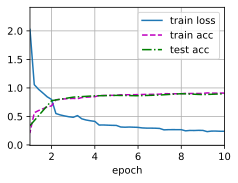

In [9]:
# 开始训练


d2l.train_ch6(net, train_iter, test_iter, 
              num_epochs, 
              lr, 
              d2l.try_gpu())


In [10]:
# 保存模型
net = net.to("cpu")

import datetime
str_time = str(datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S"))
torch.save(net, 'google_leNet_%s.pt' % str_time)  # 全保存 39M
print("训练完毕, 模型已保存至当前路径")

训练完毕, 模型已保存至当前路径
